---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

Grupo P5-23
- Estudiante: **Vivian Monge Retana** - **B64521**

- Estudiante: **Jose Ignacio Zamora Álvarez** - **B78505**

- Estudiante: **Yenner Josué González Araya** - **B83375**

- Grupo: **1/2**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

---
## 2. - Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

#### Sobre la presentación

El trabajo debe entregarse como un *notebook* de Jupyter nuevo (sin incluir información de este enunciado), en la forma de reporte. La primera parte de las asignaciones debe ser desarrollada por completo y en orden, editando las ecuaciones en $\LaTeX$. La segunda parte debe incluir el código desarrollado y sus resultados. Esto es enviado vía Mediación Virtual, uno por grupo.

## Parte 1 - Determinación teórica del número de servidores 's' para cumplir el requisito establecido

Del enunciado se conocen los siguientes datos:

Tasa de llegada:
$$
\begin{aligned}
\lambda = 7 \ \frac{personas}{minuto}
\end{aligned}
$$

Tasa de servicio: 
$$
\begin{aligned}
\nu = 0.25 \ \frac{personas}{minuto}
\end{aligned}
$$

Luego, la condición deseada corresponde a que los elementos (o personas) en la fila no sean mayores a 100 por el 95% del tiempo. Por lo tanto:
$$
\begin{aligned}
N \leq 100
\end{aligned}
$$


En primer lugar, este comportamiento deseado es un comportamiento estable dado que se pretende que la fila se encuentre alrededor de un valor. De no ser estable la fila comenzaría a aumentar descontroladamente.
Partiendo de esto entonces, se puede expresar el término $\rho$ en función de la cantidad de servidores 's' a través de la siguiente ecuación, y además debe cumplirse que este parámetro sea menor a uno:

$$
\rho = \frac{\lambda}{s \cdot \nu} < 1
$$

Remplazando con los valores conocidos se llega a lo siguiente:

$$
\rho = \frac{28}{s} < 1
$$

Es decir, que para que el sistema sea estable, la cantidad de servidores debería ser estrictamente mayor a 28.

Luego, por otra parte, se debe calcular la probabilidad de que las personas en la fila sean más de 100 (es decir, 101 ó más), esto se puede expresar de la siguiente manera:


$$
P(101+) = \sum_{i = 101}^{\infty} (1-\rho)\cdot \rho^{i}
$$

Luego, la probabilidad de que hayan más de 100 personas en la fila es el complemento de que hayan 100 ó menos personas, por lo tanto, la expresión anterior se puede reescribir de la siguiente manera:

$$
P(0 - 100) = 1 - \sum_{i = 0}^{100} (1-\rho)\cdot \rho^{i} = \rho^{101}
$$


Ahora, se quiere no exceder a las 100 personas en la fila el 95% del tiempo, por lo tanto, la probabilidad de que hayan más de 100 personas deberá ser menor o igual a 0.05, de donde se obtiene la siguiente inecuación:

$$
\rho^{101} \leq 0.05
$$

Luego, sustituyendo la expresión conocida para el término $\rho$ y despejando $s$:

$$
{(\frac{28}{s}})^{101} \leq 0.05 
$$

$$
\sqrt[101]{\frac{28^{101}}{0.05}} \leq s 
$$

$$
s\geq 28.84
$$

Con esto se tiene que para hayan 100 personas únicamente un 5% del tiempo la cantidad de servidores debe ser 28.84 y del cálculo de estabilidad del sistema se obtuvo que deben haber más de 28 servidores para que el sistema tienda hacia un estado estable, de manera que la cantidad de servidores (mínima) deberá ser 29.

$$ 
s \geq 29
$$



## Parte 2 - Modificación del código para simular y corroborar el resultado obtenido

Al código provisto en el enunciado se le realizaron modificaciones para permitir la verificación de las asignaciones, se le añadió el parámetro 's' para representar el número de servidores y se modificó la definición del parámetro 'nu' para que tome en cuenta la cantidad de servidores del sistema (nu = 0.25*s).

Se modificó el umbral a considerar para las simulaciones que en este caso corresponde a 100 o más personas en la fila.

Se cambió el valor con el que se compara 'fraccion' para que la comparación realizada corresponda a que hayan 100 o menos personas en la fila el 95% del tiempo.

Finalmente, se varió también la cantidad de clientes y el límite del eje x de la gráfica obtenida al final para abarcar el cambio en la cantidad de clientes. 

### Simulación 1 - 29 servidores

Para esta simulación se utilizan los valores determinados para lograr las condiciones establecidas en el enunciado (100 o menos personas en la fila durante el 95% del tiempo)

Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 100 solicitudes en fila:
	 0.47%
	 Sí cumple con la especificación.
Simulación es equivalente a 76.21 horas.


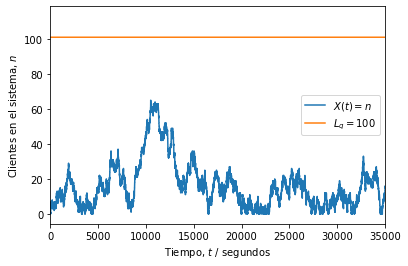

In [29]:
# Simulación 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 30000

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Número de servidores
s = 29

# Parámetro de servicio (servicios * servidores/segundos)
nu = 0.25*s/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema  ---(hay P - 1 en fila)
P = 102

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 35000))
plt.show()


### Simulación 2 - 28 servidores

Para esta simulación se modifica el valor de 's' de 29 a 28, de manera que ya no cumple con los cálculos de estabilidad realizados en la sección anterior. Los demás valores de la simulación se mantienen iguales

Parámetro lambda = 7.0
Parámetro nu = 7.0
Tiempo con más de 100 solicitudes en fila:
	 45.28%
	 No cumple con la especificación.
Simulación es equivalente a 76.51 horas.


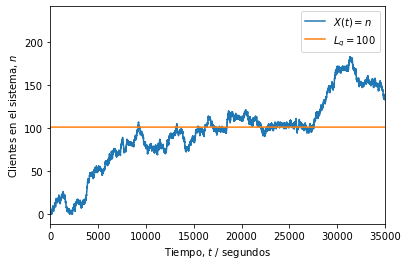

In [30]:
# Simulación 2

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 30000

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Número de servidores
s = 28

# Parámetro de servicio (servicios * servidores/segundos)
nu = 0.25*s/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema  ---(hay P - 1 en fila)
P = 102

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 35000))
plt.show()


## Conclusiones
Como se puede observar de las simulaciones realizadas, el valor calculado en la parte 1 del proyecto parece ser correcto pues para este se obtienen resultados que coinciden con el límite establecido y la cantidad de clientes adopta un comportamiento estable, sin crecer de manera descontrolada, en cambio, en la segunda simmulación, en que se utilizó un valor menor al obtenido en los cálculos por una unidad (28 en lugar de 29), el comportamiento fue completamente distinto, la cantidad de clientes fue mucho más inestable y no logro mantener la condición de menos de 100 personas en la fila por el 95 % del tiempo. 

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---